# Import Needed Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch


# Load Data

In [31]:
# Point to the extracted directory
data_root = './data/'

train_data = datasets.STL10(root=data_root, split='train')
test_data = datasets.STL10(root=data_root, split='test')

In [32]:
img , label = train_data[0]
train_data.classes[label]

'bird'

In [33]:
train_data

Dataset STL10
    Number of datapoints: 5000
    Root location: ./data/
    Split: train

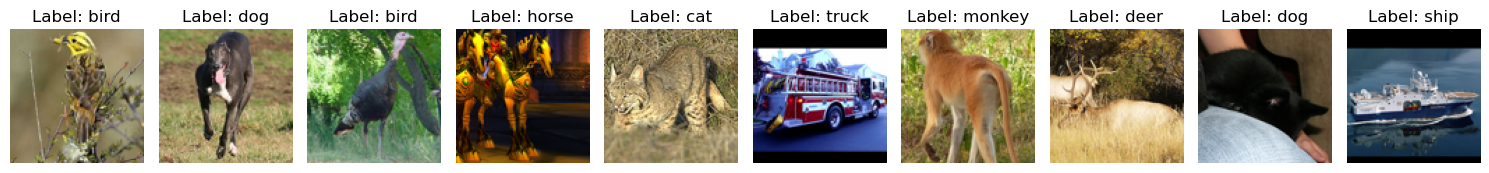

In [34]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

def show_samples(dataset, num_samples=10):
    transform = transforms.ToTensor()
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i in range(num_samples):
        img, label = dataset[i]
        
        if isinstance(img, torch.Tensor):
            tensor_img = img
        else:
            tensor_img = transform(img)
 
        
        tensor_img = torch.clamp(tensor_img, 0, 1)
        
        # Convert to numpy for display
        img_to_show = tensor_img.permute(1, 2, 0).numpy()

        # Display image
        axes[i].imshow(img_to_show)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(f"Label: {dataset.classes[label]}")
    
    plt.tight_layout()
    plt.show()

# Use the function
show_samples(train_data)


**Visualize samples of data**

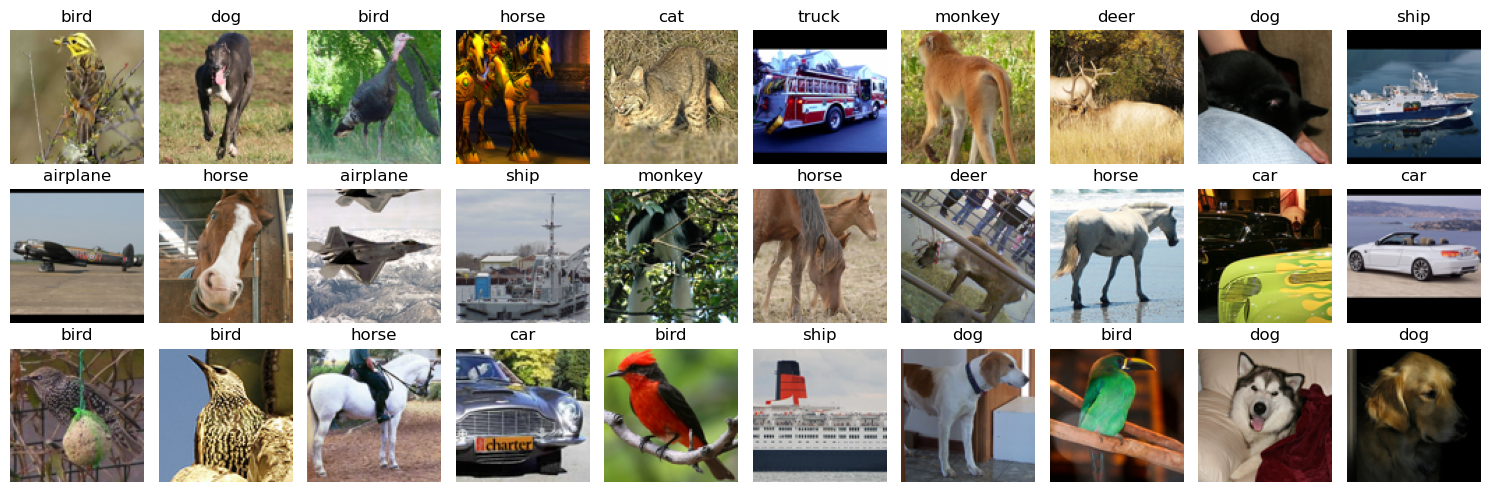

In [35]:
transform = transforms.ToTensor()
num_of_rows = 3
classes_count = len(train_data.classes)

fig, axes = plt.subplots(num_of_rows, classes_count, figsize=(15, 5))

for row in range(3):
    for i in range(classes_count):
        img, label = train_data[i + row*classes_count]
        tensor_img = transform(img)

        tensor_img = torch.clamp(tensor_img, 0, 1)

        # Convert to numpy for display
        #                                          0      1      2
        # tensor_img in this shape            (Channels,Height,Width)
        #                                          1      2      0
        # permute change the order of them to (Height,Width,Channels)
        # and this is the order to display in imshow
        img_to_show = tensor_img.permute(1, 2, 0).numpy()
    

        axes[row, i].imshow(img_to_show) # imshow takes numpy 
        axes[row, i].axis('off')  # Hide axes
        axes[row, i].set_title(f"{train_data.classes[label]}")

plt.tight_layout()
plt.show()


# Processes On Data

In [36]:
def data_to_numpy(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(np.array(img).flatten())  
        labels.append(label)
    return np.array(data), np.array(labels)

X_train, y_train = data_to_numpy(train_data)
X_test, y_test = data_to_numpy(test_data)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit Models

In [54]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca, y_train)

y_pred_knn = knn.predict(X_test_pca)

# Accuracy

In [56]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.34


# Loss Curve

In [61]:
knn_losses = []
knn_acc = []
k_arr = range(1, 20)
for k in k_arr:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_pca, y_train)
    train_acc = accuracy_score(y_test, knn_temp.predict(X_test_pca))
    knn_losses.append(1 - train_acc)
    knn_acc.append(train_acc)


print(f"KNN Best Loss: {min(knn_losses):.2f}")

KNN Best Loss: 0.66


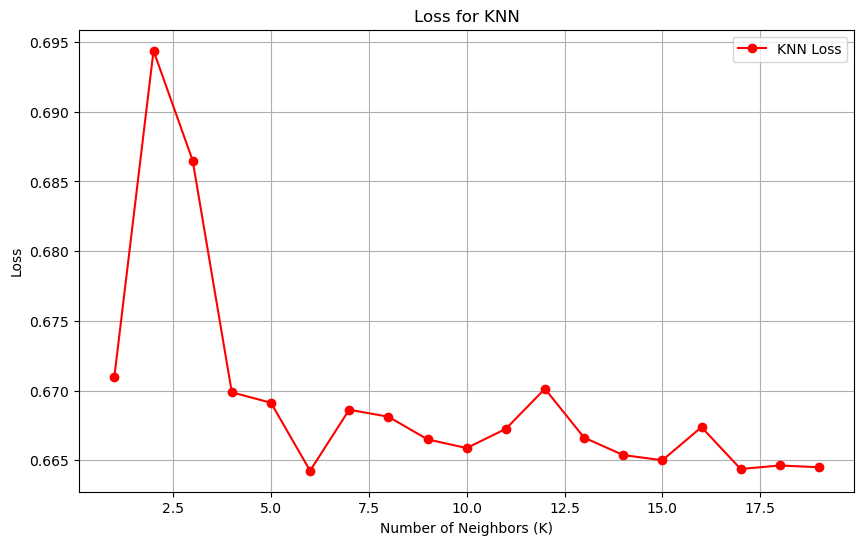

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(k_arr, knn_losses, label="KNN Loss", color="red", marker="o")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Loss")
plt.title("Loss for KNN")
plt.legend()
plt.grid()
plt.show()

In [53]:
knn_acc

[0.329,
 0.305625,
 0.3135,
 0.330125,
 0.330875,
 0.33575,
 0.331375,
 0.331875,
 0.3335]

# Confusion Matrix

In [14]:
# cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_knn = confusion_matrix(y_test, y_pred_knn)


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


# disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=np.unique(y_test))
# disp_log_reg.plot(ax=ax[0], cmap='Blues', values_format='d')
# ax[0].set_title('Confusion Matrix - Logistic Regression')


disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y_test))
disp_knn.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title('Confusion Matrix - KNN')

plt.tight_layout()
plt.show()

NameError: name 'y_pred_log_reg' is not defined

#  Precision-Recall Curve

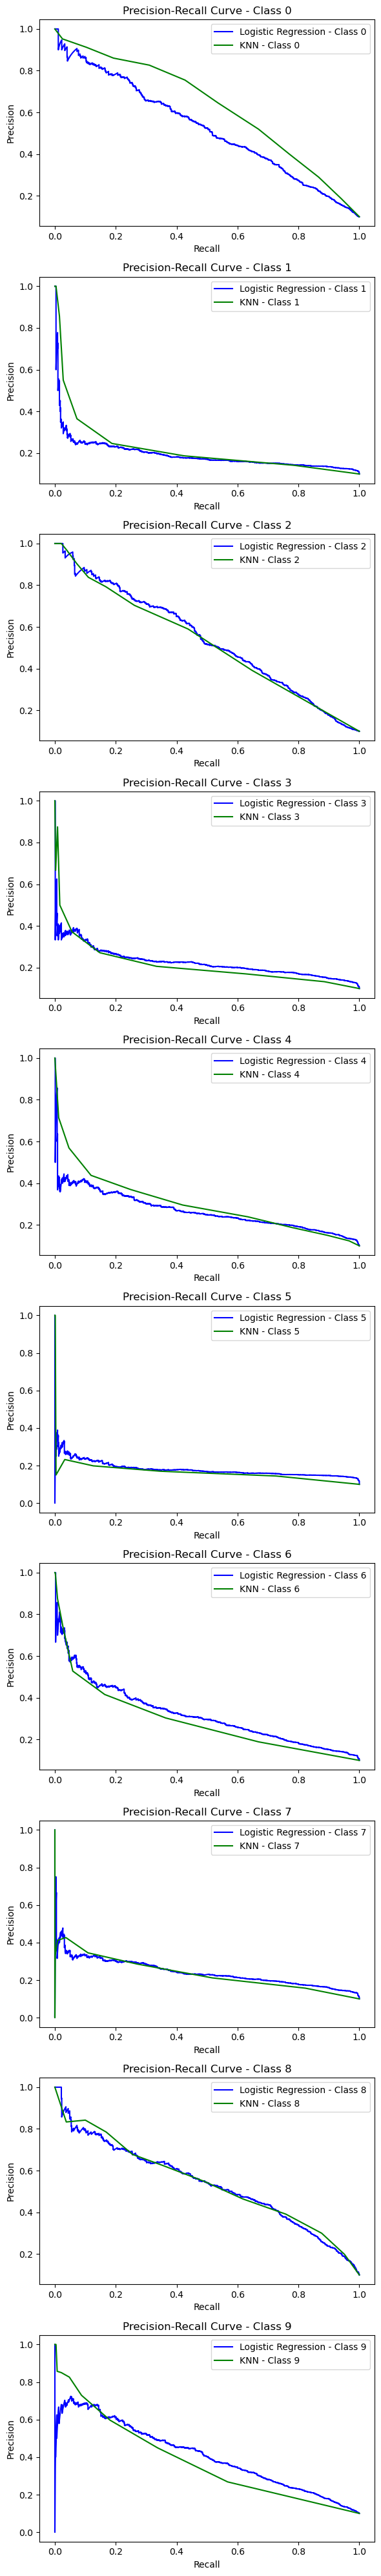

In [ ]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


y_proba_log_reg = log_reg.predict_proba(X_test_scaled)


y_proba_knn = knn.predict_proba(X_test_scaled)


precision_log_reg, recall_log_reg = {}, {}
precision_knn, recall_knn = {}, {}
fpr_log_reg, tpr_log_reg = {}, {}
fpr_knn, tpr_knn = {}, {}

# Compute Precision-Recall Curve and ROC Curve for each class
for i in range(y_train_bin.shape[1]):
    precision_log_reg[i], recall_log_reg[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    precision_knn[i], recall_knn[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_knn[:, i])

    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])

# Plot Precision-Recall Curves for each class
num_classes = y_train_bin.shape[1]
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i in range(num_classes):
    axes[i].plot(recall_log_reg[i], precision_log_reg[i], color='blue', label=f'Logistic Regression - Class {i}')
    axes[i].plot(recall_knn[i], precision_knn[i], color='green', label=f'KNN - Class {i}')
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Precision-Recall Curve - Class {i}')
    axes[i].legend()

plt.tight_layout()
plt.show()




In [ ]:
avg_precision_log_reg = {}
avg_precision_knn = {}

for i in range(y_train_bin.shape[1]):
    avg_precision_log_reg[i] = average_precision_score(y_test_bin[:, i], y_proba_log_reg[:, i])  
    avg_precision_knn[i] = average_precision_score(y_test_bin[:, i], y_proba_knn[:, i])  


mean_avg_precision_log_reg = np.mean(list(avg_precision_log_reg.values()))
mean_avg_precision_knn = np.mean(list(avg_precision_knn.values()))

print(f"Average Precision for Logistic Regression: {mean_avg_precision_log_reg:.2f}")
print(f"Average Precision for KNN: {mean_avg_precision_knn:.2f}")


if mean_avg_precision_log_reg > mean_avg_precision_knn:
    best_model_precision = "Logistic Regression"
else:
    best_model_precision = "KNN"

print(f"The better model based on Precision-Recall is: {best_model_precision}")


Average Precision for Logistic Regression: 0.34
Average Precision for KNN: 0.30
The better model based on Precision-Recall is: Logistic Regression


# AUC Curve

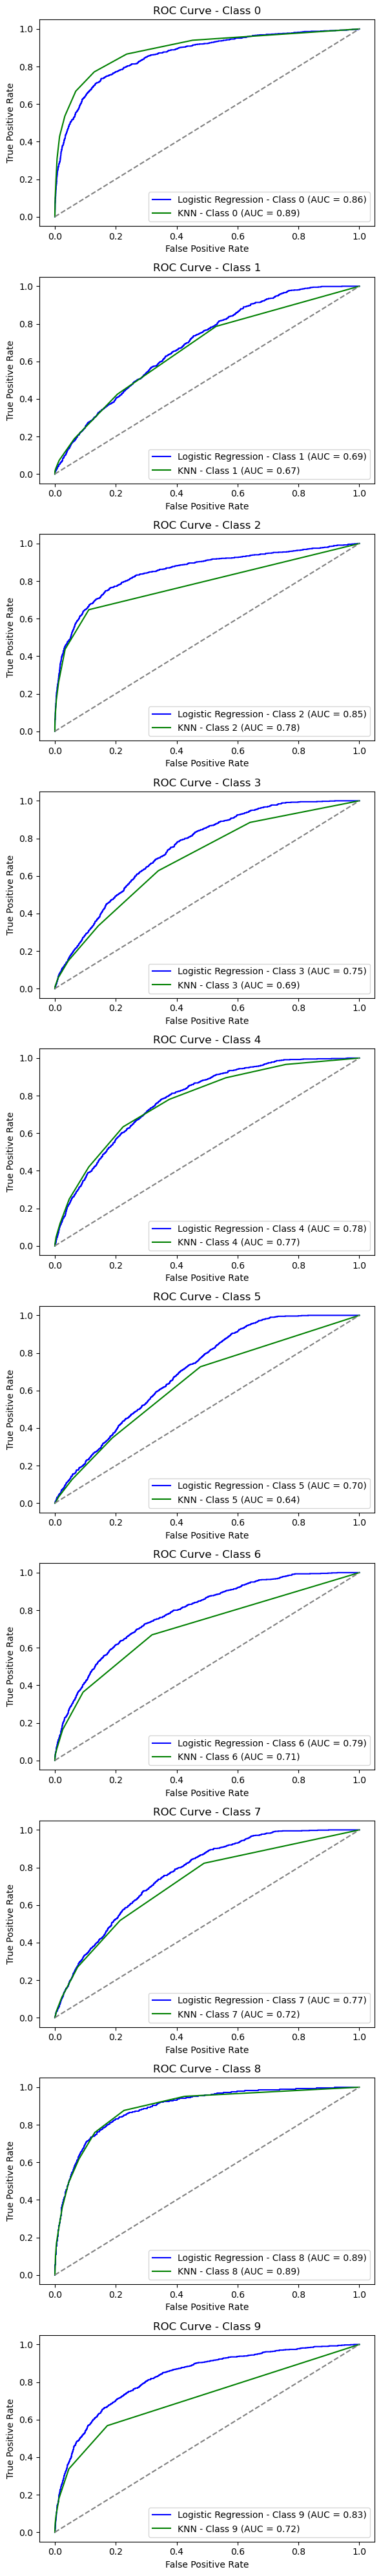

In [ ]:
fig, axes = plt.subplots(num_classes, 1, figsize=(6, 4 * num_classes))

for i in range(num_classes):
    axes[i].plot(fpr_log_reg[i], tpr_log_reg[i], color='blue', label=f'Logistic Regression - Class {i} (AUC = {auc(fpr_log_reg[i], tpr_log_reg[i]):.2f})')
    axes[i].plot(fpr_knn[i], tpr_knn[i], color='green', label=f'KNN - Class {i} (AUC = {auc(fpr_knn[i], tpr_knn[i]):.2f})')
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')  
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - Class {i}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [175]:
auc_log_reg = {}
auc_knn = {}

for i in range(y_train_bin.shape[1]):
    auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])  # AUC for Logistic Regression
    auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])  # AUC for KNN


avg_auc_log_reg = np.mean(list(auc_log_reg.values()))
avg_auc_knn = np.mean(list(auc_knn.values()))

print(f"Average AUC for Logistic Regression: {avg_auc_log_reg:.2f}")
print(f"Average AUC for KNN: {avg_auc_knn:.2f}")


if avg_auc_log_reg > avg_auc_knn:
    best_model = "Logistic Regression"
else:
    best_model = "KNN"

print(f"The better model based on AUC is: {best_model}")


Average AUC for Logistic Regression: 0.79
Average AUC for KNN: 0.75
The better model based on AUC is: Logistic Regression
